# **Preparing for Clustering**

In [1]:
pip install HDBSCAN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for HDBSCAN: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582066 sha256=3f54c2fd9502f43d256f70b665c4839658ce98d89f27624386b1f6b56b7e7b4c
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built HDBSCAN


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')
data3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
location,,,,,,,,,,,,,,
Afghanistan,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
Afghanistan,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
Afghanistan,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
Afghanistan,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
Afghanistan,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
Zimbabwe,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
Zimbabwe,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000002,NaN,NaN,NaN,0.0833,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Afghanistan,0.000000,NaN,NaN,NaN,0.0833,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Afghanistan,0.000000,NaN,NaN,NaN,0.0833,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Afghanistan,0.000000,NaN,NaN,NaN,0.0833,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Afghanistan,0.000000,NaN,NaN,NaN,0.0833,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,0.000085,0.000114,0.187826,0.171859,0.5101,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294
Zimbabwe,0.000076,0.000000,0.189565,0.171996,0.5101,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294
Zimbabwe,0.000068,0.000000,0.193043,0.172568,0.5100,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294


In [6]:
data2=clean_dataset(data2)
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Albania,0.003866,0.005060,0.189565,0.000000,0.5648,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Albania,0.004512,0.003162,0.191304,0.000000,0.6019,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Albania,0.004863,0.002530,0.191304,0.000027,0.6019,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Albania,0.004540,0.003162,0.191304,0.000027,0.6019,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Albania,0.004409,0.002530,0.191304,0.000027,0.6019,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,0.000085,0.000114,0.187826,0.171859,0.5101,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294
Zimbabwe,0.000076,0.000000,0.189565,0.171996,0.5101,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294
Zimbabwe,0.000068,0.000000,0.193043,0.172568,0.5100,0.002073,0.010652,0.354201,0.028097,0.034169,0.326705,0.123188,0.245294


In [7]:
data2=data2.groupby('location').mean()

temp_df=data2.iloc[:,5:]
temp_df

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Albania,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Argentina,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835
Australia,0.000149,0.378308,0.044060,0.138118,0.293850,0.125000,0.278261,0.901105
Austria,0.005189,0.385084,0.102028,0.181449,0.644647,0.329545,0.534058,0.844338
...,...,...,...,...,...,...,...,...
Vanuatu,0.001096,0.019443,0.723870,0.373392,0.061503,0.380682,0.000000,0.513594
Vietnam,0.014990,0.047393,0.257493,0.169601,0.020501,0.542614,0.188406,0.660890
Yemen,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [8]:
count=1
X=temp_df

In [9]:
import warnings
warnings.filterwarnings('ignore') # 
kmean_avg_dist, gmm_avg_dist= [],[]


In [10]:
count=1
kmean_avg_dist=[]
from sklearn.base import warnings
while (count<16): 
 count=count+1
 #training k-means model
 kmeans = KMeans(n_clusters=count)
 kmeans.fit(X)
 #predictions from kmeans
 pred = kmeans.predict(X)
 #frame = pd.DataFrame(X)
 score_Kmeans= metrics.silhouette_score(X,pred)
 kmean_avg_dist.append(kmeans.inertia_)
 print("Silhouette score for",count,"clusters Kmeans:",score_Kmeans)

Silhouette score for 2 clusters Kmeans: 0.3188041152037076
Silhouette score for 3 clusters Kmeans: 0.2892785583732005
Silhouette score for 4 clusters Kmeans: 0.28109728856297406
Silhouette score for 5 clusters Kmeans: 0.29015676171433563
Silhouette score for 6 clusters Kmeans: 0.28451498520505386
Silhouette score for 7 clusters Kmeans: 0.2765762880411249
Silhouette score for 8 clusters Kmeans: 0.28048539601139544
Silhouette score for 9 clusters Kmeans: 0.2987851129339221
Silhouette score for 10 clusters Kmeans: 0.2798355590022461
Silhouette score for 11 clusters Kmeans: 0.29171316042833834
Silhouette score for 12 clusters Kmeans: 0.2670770380630941
Silhouette score for 13 clusters Kmeans: 0.2713556233084803
Silhouette score for 14 clusters Kmeans: 0.23292725982410767
Silhouette score for 15 clusters Kmeans: 0.254969566273328
Silhouette score for 16 clusters Kmeans: 0.27004904188212175


In [11]:
predictions=pd.DataFrame(pred)
predictions.index=data2.index
predictions.columns=['Kmeans']
predictions=predictions.groupby(predictions.index).mean()

In [12]:
count=1
from sklearn.base import warnings
while (count<16): 
 count=count+1
 # training gaussian mixture model 
 gmm = GaussianMixture(n_components=count)
 gmm.fit(X)
 #predictions from gmm
 labels = gmm.predict(X)
 score_GMM=metrics.silhouette_score(X,labels)
 print("Silhouette score for",count,"clusters:","GMM:",score_GMM)


Silhouette score for 2 clusters: GMM: 0.2794481881668174
Silhouette score for 3 clusters: GMM: 0.2445977189690677
Silhouette score for 4 clusters: GMM: 0.24644560554106815
Silhouette score for 5 clusters: GMM: 0.2782143066816363
Silhouette score for 6 clusters: GMM: 0.2571589345910689
Silhouette score for 7 clusters: GMM: 0.16892466804414843
Silhouette score for 8 clusters: GMM: 0.24105357882368977
Silhouette score for 9 clusters: GMM: 0.2307281402775887
Silhouette score for 10 clusters: GMM: 0.26433690080849104
Silhouette score for 11 clusters: GMM: 0.24819859798609592
Silhouette score for 12 clusters: GMM: 0.24841792587203246
Silhouette score for 13 clusters: GMM: 0.21899425112643095
Silhouette score for 14 clusters: GMM: 0.22105179123546315
Silhouette score for 15 clusters: GMM: 0.24845244326026697
Silhouette score for 16 clusters: GMM: 0.18913719787106592


In [13]:
 count=1
from sklearn.base import warnings
while (count<16):
  count=count+1
  #training spectral model
  spectral = SpectralClustering(n_clusters=8)
  spectral.fit(X)
  sp_labels = spectral.labels_
  score_SP= metrics.silhouette_score(X,sp_labels)
  print("Silhouette score for",count,"clusters Spectral:",score_SP)
#predictions

Silhouette score for 2 clusters Spectral: 0.27772544625360507
Silhouette score for 3 clusters Spectral: 0.26738511232795176
Silhouette score for 4 clusters Spectral: 0.2576762768347488
Silhouette score for 5 clusters Spectral: 0.25225000820174404
Silhouette score for 6 clusters Spectral: 0.2711628918597998
Silhouette score for 7 clusters Spectral: 0.26631901562099874
Silhouette score for 8 clusters Spectral: 0.274197035023248
Silhouette score for 9 clusters Spectral: 0.27016903481580556
Silhouette score for 10 clusters Spectral: 0.2768723637142975
Silhouette score for 11 clusters Spectral: 0.2795801003150474
Silhouette score for 12 clusters Spectral: 0.28002403437813006
Silhouette score for 13 clusters Spectral: 0.2690058646762002
Silhouette score for 14 clusters Spectral: 0.2561409091642788
Silhouette score for 15 clusters Spectral: 0.2566326992217939
Silhouette score for 16 clusters Spectral: 0.26314520348095993


In [14]:
count=1
from sklearn.base import warnings
while (count<16): 
 count=count+1
 #Hierarchical 
 hierarchical_cluster = AgglomerativeClustering(n_clusters=count, affinity='euclidean', linkage='ward')
 hc_labels=hierarchical_cluster.fit_predict(X)
 #frame = pd.DataFrame(X)
 score_HC= metrics.silhouette_score(X,hc_labels)
 print("Silhouette score for",count,"clusters Hierarchical/Agglomerative:",score_HC)
 

Silhouette score for 2 clusters Hierarchical/Agglomerative: 0.3047049516658487
Silhouette score for 3 clusters Hierarchical/Agglomerative: 0.24098784522325872
Silhouette score for 4 clusters Hierarchical/Agglomerative: 0.2380478830509247
Silhouette score for 5 clusters Hierarchical/Agglomerative: 0.22843676835989274
Silhouette score for 6 clusters Hierarchical/Agglomerative: 0.23724361073534142
Silhouette score for 7 clusters Hierarchical/Agglomerative: 0.24181387194099802
Silhouette score for 8 clusters Hierarchical/Agglomerative: 0.24672608651895486
Silhouette score for 9 clusters Hierarchical/Agglomerative: 0.2663444130302447
Silhouette score for 10 clusters Hierarchical/Agglomerative: 0.2781138817360856
Silhouette score for 11 clusters Hierarchical/Agglomerative: 0.2819286536939505
Silhouette score for 12 clusters Hierarchical/Agglomerative: 0.2722692047137064
Silhouette score for 13 clusters Hierarchical/Agglomerative: 0.2753820966281511
Silhouette score for 14 clusters Hierarchic

In [15]:
#training affinity propagation model
ap = AffinityPropagation(preference=-5, damping=0.95)
ap.fit(X)
#predictions from AP
ap_labels = ap.predict(X)
ap_labels

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

In [16]:
#training means shift model
ms = MeanShift()
ms.fit(X)
#predictions from shift model
ms_labels = ms.predict(X)
metrics.silhouette_score(X,ms_labels)


0.17487771873710306

In [17]:
ds=DBSCAN()
ds.fit(X)
ds_labels=ds.labels_
ds_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [18]:
import hdbscan
hs=hdbscan.HDBSCAN(min_cluster_size=5)
hs.fit(X)
hs_labels=hs.labels_
metrics.silhouette_score(X,hs_labels)

0.019064355134096208

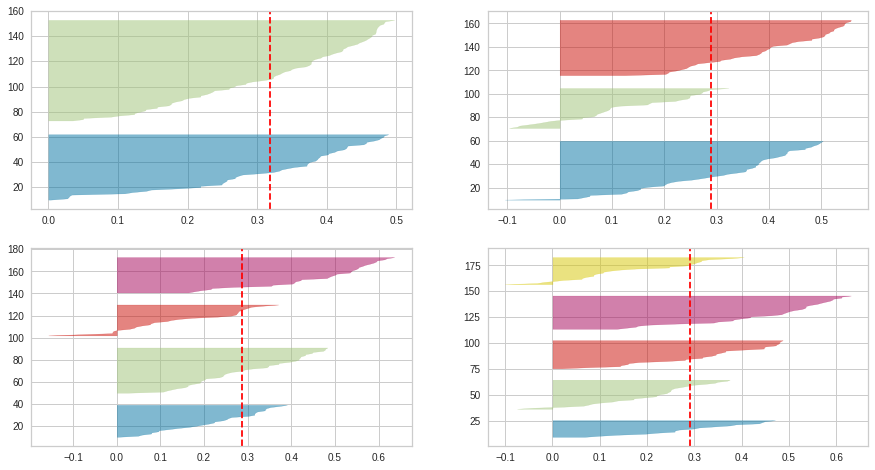

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

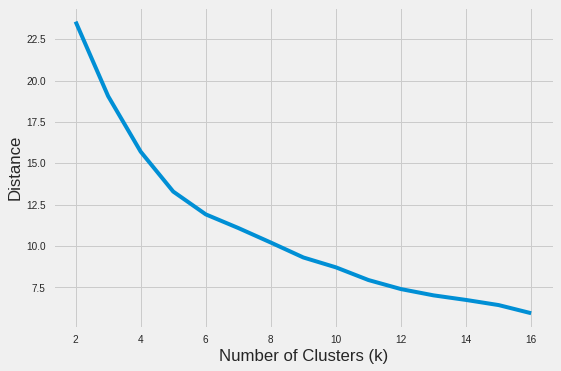

In [20]:
range_n_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
import matplotlib.style as style
style.use("fivethirtyeight")
plt.plot(range_n_clusters, kmean_avg_dist)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

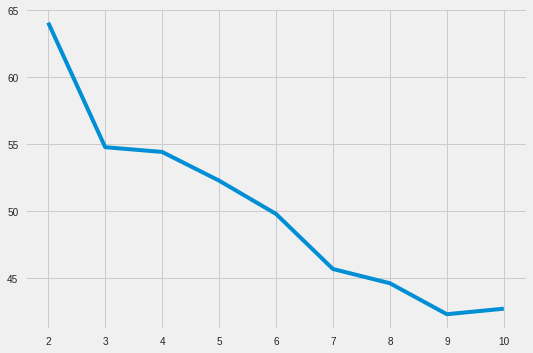

In [21]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = KMeans(n_clusters=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

# **Finding Target Country Cluster**

In [22]:
new_country="Nigeria"
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#predictions from kmeans
pred = kmeans.predict(X)
predictions=pd.DataFrame(pred)
predictions.index=data2.index
predictions.columns=['Kmeans']
pcluster=predictions.Kmeans[predictions.index==new_country]
pcluster=int(pcluster)
pcluster

1

In [23]:
cluster=predictions[predictions.Kmeans==pcluster]
cluster

,Kmeans
location,
Algeria,1
Bahamas,1
Barbados,1
Benin,1
Botswana,1
Brazil,1
Burkina Faso,1
Cambodia,1
Cape Verde,1


In [24]:
data = pd.read_csv('complete_dataset_cleaned_new.csv')
data=data.iloc[:,2:]
data=data.iloc[:,:-2]
# data=data[data.location!='Algeria']
data.index=data.date
data.pop('date')
data.pop('human_development_index')
loca=data.pop('location')

data

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/17/2020,13.42,0.11,1.20,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.40
7/18/2020,13.60,0.25,1.18,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.52
7/20/2020,13.74,0.20,1.15,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.45
7/21/2020,13.29,0.29,1.14,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.27
7/22/2020,13.45,0.25,1.13,0.00,74.07,17.35,13913.84,278.36,6.73,0.7,30.4,1.90,76.88,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,133.97,0.95,1.22,174.23,28.00,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,4.71
4/27/2022,266.52,2.39,1.21,174.37,27.99,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,4.71
4/28/2022,228.81,1.22,1.21,174.51,27.99,35.61,54225.45,151.09,10.79,19.1,24.6,2.77,78.86,4.73


In [25]:
scaler2= MinMaxScaler()
scaler2.fit(data)
c=data.columns
i=data.index
data = pd.DataFrame(scaler2.transform(data))
data.columns=c
data.index=i
data.insert(0,"location", loca)
data

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,
7/17/2020,Algeria,0.000512,0.001486,0.288608,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.000000,0.405333,0.066946,0.621951,0.007761
7/18/2020,Algeria,0.000519,0.003378,0.283544,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.000000,0.405333,0.066946,0.621951,0.008426
7/20/2020,Algeria,0.000525,0.002702,0.275949,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.000000,0.405333,0.066946,0.621951,0.008038
7/21/2020,Algeria,0.000508,0.003918,0.273418,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.000000,0.405333,0.066946,0.621951,0.007040
7/22/2020,Algeria,0.000514,0.003378,0.270886,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.000000,0.405333,0.066946,0.621951,0.006375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,United States,0.005116,0.012836,0.293671,0.643437,0.2800,0.022339,0.541692,0.199195,0.557949,0.497297,0.250667,0.139749,0.718537,0.026110
4/27/2022,United States,0.010178,0.032293,0.291139,0.643955,0.2799,0.022339,0.541692,0.199195,0.557949,0.497297,0.250667,0.139749,0.718537,0.026110
4/28/2022,United States,0.008738,0.016484,0.291139,0.644472,0.2799,0.022339,0.541692,0.199195,0.557949,0.497297,0.250667,0.139749,0.718537,0.026221


In [26]:
c_countries=list(cluster.index)
data_new=data.loc[data.location.isin(c_countries)]
data_new

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,
7/17/2020,Algeria,0.000512,0.001486,0.288608,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.0,0.405333,0.066946,0.621951,0.007761
7/18/2020,Algeria,0.000519,0.003378,0.283544,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.0,0.405333,0.066946,0.621951,0.008426
7/20/2020,Algeria,0.000525,0.002702,0.275949,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.0,0.405333,0.066946,0.621951,0.008038
7/21/2020,Algeria,0.000508,0.003918,0.273418,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.0,0.405333,0.066946,0.621951,0.007040
7/22/2020,Algeria,0.000514,0.003378,0.270886,0.000000,0.7407,0.009753,0.080419,0.552673,0.256315,0.0,0.405333,0.066946,0.621951,0.006375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,South Africa,0.003255,0.003378,0.359494,0.215526,0.3611,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.017074
4/27/2022,South Africa,0.004096,0.000676,0.354430,0.215932,0.3610,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.017628
4/28/2022,South Africa,0.002666,0.000946,0.346835,0.216006,0.3610,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.017906


In [27]:
data_new.pop('location')
data_new.index=pd.to_datetime(data_new.index)
data_new=data_new.groupby(data_new.index).mean()
data_new

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2020-03-05,7.637643e-07,0.000000,0.265823,0.000000,0.13890,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.000000
2020-03-07,0.000000e+00,0.000000,0.265823,0.000000,0.13890,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.000000
2020-03-08,1.145646e-06,0.000000,0.265823,0.000000,0.13890,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.000000
2020-03-09,0.000000e+00,0.000000,0.265823,0.000000,0.13890,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.000000
2020-03-10,2.673175e-06,0.000000,0.265823,0.000000,0.13890,0.030017,0.061894,0.336092,0.166419,0.2,0.480000,0.102092,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,1.627773e-03,0.001689,0.270886,0.107763,0.40715,0.019885,0.071157,0.444383,0.211367,0.1,0.442667,0.084519,0.310976,0.008592
2022-04-27,2.048607e-03,0.000338,0.263291,0.107966,0.40710,0.019885,0.071157,0.444383,0.211367,0.1,0.442667,0.084519,0.310976,0.008870
2022-04-28,1.334296e-03,0.000473,0.255696,0.108003,0.40710,0.019885,0.071157,0.444383,0.211367,0.1,0.442667,0.084519,0.310976,0.009008


In [28]:
c=data_new.columns
i=data_new.index
data_new=pd.DataFrame(scaler2.inverse_transform(data_new))
data_new.columns=c
data_new.index=i

data_new 

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
2020-03-05,0.020,0.000,1.110,0.000,13.890,46.75,12294.88,200.38,5.520,8.1,33.2,2.32,64.130,0.000
2020-03-07,0.000,0.000,1.110,0.000,13.890,46.75,12294.88,200.38,5.520,8.1,33.2,2.32,64.130,0.000
2020-03-08,0.030,0.000,1.110,0.000,13.890,46.75,12294.88,200.38,5.520,8.1,33.2,2.32,64.130,0.000
2020-03-09,0.000,0.000,1.110,0.000,13.890,46.75,12294.88,200.38,5.520,8.1,33.2,2.32,64.130,0.000
2020-03-10,0.070,0.000,1.110,0.000,13.890,46.75,12294.88,200.38,5.520,8.1,33.2,2.32,64.130,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,42.625,0.125,1.130,29.180,40.715,32.05,13104.36,239.37,6.125,4.4,31.8,2.11,70.505,1.550
2022-04-27,53.645,0.025,1.100,29.235,40.710,32.05,13104.36,239.37,6.125,4.4,31.8,2.11,70.505,1.600
2022-04-28,34.940,0.035,1.070,29.245,40.710,32.05,13104.36,239.37,6.125,4.4,31.8,2.11,70.505,1.625


In [29]:
file_name='Clustering_Predictions_02_22.xlsx'
data_new.to_excel(file_name)
print("excel file created!") 

excel file created!


In [30]:
predictions
predictions.to_csv('clusters2.csv')

In [32]:
kmean_avg_dist=pd.DataFrame(kmean_avg_dist)
kmean_avg_dist.to_csv('distance.csv')